In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [14]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [5]:
from sklearn.model_selection import train_test_split

In [36]:
#load data
data_x = np.load('data_x_aumentated.npy') #images
data_y = np.load('data_y_aumentated.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


# **Splitting data in train - validation - test**

In [37]:
#percentage of the dataset which will be on TRAIN - TEST - VALIDATION
TRAIN_PERCENTAGE = 0.8
TEST_PERCENTAGE = 0.1
VALIDATION_PERCENTAGE = 0.1

In [38]:
train_size = int(TRAIN_PERCENTAGE * TOTAL_IMAGES)
test_size = int(TEST_PERCENTAGE * TOTAL_IMAGES)
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

In [39]:
train_x = data_x[:train_size]
train_y = data_y[:train_size]
data_x = data_x[train_size:]
data_y = data_y[train_size:]

test_x = data_x[:test_size]
test_y = data_y[:test_size]
data_x = data_x[test_size:]
data_y = data_y[test_size:]

validation_x = data_x #all the remainder we can let on validation
validation_y = data_y
del data_x
del data_y

In [40]:
print("train_size = ", len(train_y))
print("test_size = ", len(test_y))
print("validation_size = ", len(validation_y))

train_size =  1894
test_size =  236
validation_size =  238


In [41]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [43]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [44]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [45]:
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,CHANNELS),
    pooling=None,
    classes=NUM_CLASSES,
   # classifier_activation="softmax",
#    **kwargs
)

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#3rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#4th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
#new_model.add(tf.keras.layers.l2( l=0.01))
#new_model.add(layers.GlobalAveragePooling2D())
#output Dense Layer
new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


In [47]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          589856    
                                                                 
 batch_normalization_3 (Batc  (None, 4, 4, 32)         128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)         

In [48]:
epochs = 50

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_y,epochs=epochs,verbose=1,validation_data=(validation_x, validation_y),shuffle=False)

Epoch 1/50
60/60 [==============================] - 34s 352ms/step - loss: 1.6146 - acc: 0.6521 - val_loss: 8.9811 - val_acc: 0.2059
Epoch 2/50
60/60 [==============================] - 18s 308ms/step - loss: 1.0133 - acc: 0.8511 - val_loss: 5.4946 - val_acc: 0.2563
Epoch 3/50
60/60 [==============================] - 18s 308ms/step - loss: 0.7289 - acc: 0.8986 - val_loss: 10.3027 - val_acc: 0.2689
Epoch 4/50
60/60 [==============================] - 19s 310ms/step - loss: 0.5645 - acc: 0.9256 - val_loss: 5.5875 - val_acc: 0.2647
Epoch 5/50
60/60 [==============================] - 18s 308ms/step - loss: 0.4396 - acc: 0.9356 - val_loss: 12.7728 - val_acc: 0.3361
Epoch 6/50
60/60 [==============================] - 19s 309ms/step - loss: 0.3391 - acc: 0.9504 - val_loss: 7.5542 - val_acc: 0.2815
Epoch 7/50
60/60 [==============================] - 19s 310ms/step - loss: 0.2889 - acc: 0.9509 - val_loss: 3.0919 - val_acc: 0.4622
Epoch 8/50
60/60 [==============================] - 19s 310ms/step 

In [24]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [54]:
def getLayerIndexByName(model, layername):
    for idx, layer in enumerate(model.layers):
        print("layer_name = ", layer.name)
        print("layer_idx = ", idx)
        if layer.name == layername:
            return idx

In [57]:
#print(getLayerIndexByName(new_model, 'flatten_1'))

layer_name =  resnet50
layer_idx =  0
layer_name =  conv2d_2
layer_idx =  1
layer_name =  batch_normalization_3
layer_idx =  2
layer_name =  activation_4
layer_idx =  3
layer_name =  max_pooling2d_2
layer_idx =  4
layer_name =  conv2d_3
layer_idx =  5
layer_name =  batch_normalization_4
layer_idx =  6
layer_name =  activation_5
layer_idx =  7
layer_name =  max_pooling2d_3
layer_idx =  8
layer_name =  flatten_1
layer_idx =  9
9


In [49]:
model_name = 'resnet50-baseline-holdout-50epochs.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: resnet50-baseline-holdout-50epochs.npy\assets


INFO:tensorflow:Assets written to: resnet50-baseline-holdout-50epochs.npy\assets


# **Random Forest - flatting**

In [58]:
new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
featureVector = new_model_rf.predict(train_x)

60/60 [==============================] - 6s 81ms/step


In [59]:
featureVector2 = new_model_rf.predict(test_x)

8/8 [==============================] - 1s 145ms/step


In [60]:
print(featureVector.shape)

(1894, 64)


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_y)



RandomForestClassifier()

In [63]:
test_x.shape

(236, 128, 128, 3)

In [64]:
y_pred=clf.predict(featureVector2)

In [65]:
featureVector.shape

(1894, 64)

In [66]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.961864406779661


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

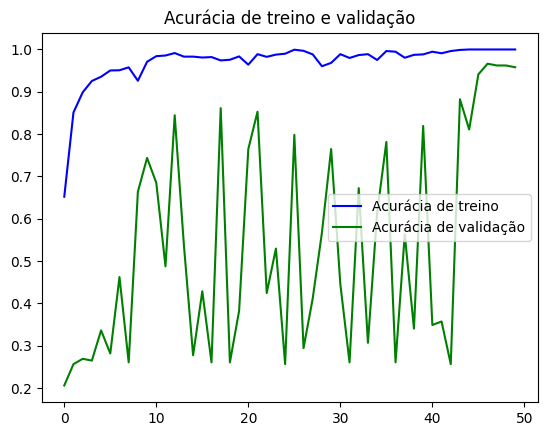

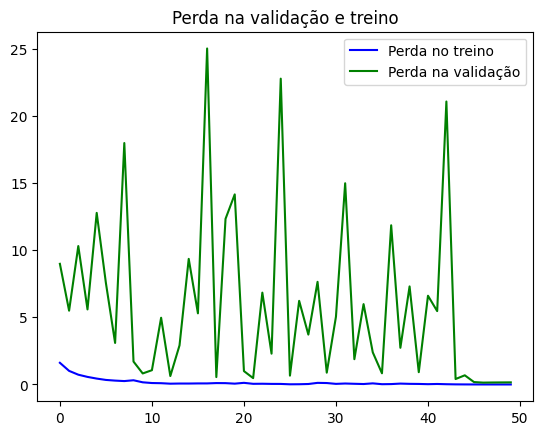

In [69]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [70]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

8/8 [==============================] - 1s 89ms/step - loss: 0.1033 - acc: 0.9703
Test loss: 0.10331258922815323
Test accuracy: 0.9703390002250671


In [71]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [74]:
cm = confusion_matrix(test_y, pred_probs)

In [76]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.9704451861805887
Sensitivity: [0.98275862 1.         0.94915254 0.94642857]
Specificity: [1.         1.         0.97740113 0.98333333]
Precision:   [1.         1.         0.93333333 0.94642857]
Accuracy:    [0.99576271 1.         0.97033898 0.97457627]
